# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:
1. 2024AA05296, Balsure Aniket K, 20%
2. 2024AA05297, Samuel Joseph P
3. 2024AA05298, Shailesh Narayan Wazalwar, 20%
4. 2024AA05299, Ankit, 20%
5. 2024AA05300, Dhoble Trupti, 20%

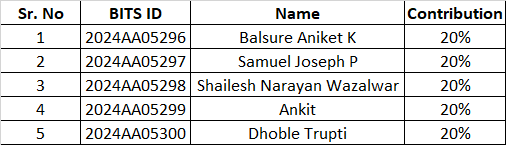

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

**PEAS Framework for the Problem**
The PEAS (Performance measure, Environment, Actuators, Sensors) model is used to define the agent and its interaction with the problem environment. Below is the description for this problem:

***Performance Measure (P):***
The agent must determine the shortest and most cost-effective route while ensuring all cities are visited.
The agent should return to the starting city after visiting all locations.
The transportation cost should be minimized while ensuring all paths taken are valid.
The agent should adapt dynamically to the given starting city and compute an optimal route accordingly.

***Environment (E):***
The problem space consists of cities connected by roads, forming a graph structure.
The roads have different travel costs, impacting the agent’s decisions.
The agent operates in a dynamic environment, where it must choose paths based on the given constraints.

***Actuators (A):***
The agent can navigate from one city to another using defined search algorithms.
The agent must decide on the next move based on the transition model and the path cost.

***Sensors (S):***
The agent can perceive the current location in the city network.
It receives user input to determine the starting city.
The agent uses path cost data from the adjacency matrix to calculate the optimal route.


Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [13]:
#Code Block : Set Initial State (Must handle dynamic inputs)
import numpy as np
import time
import sys

global max_depth_hill_climb

In [14]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)
# Adjacency matrix for the graph (distances between nodes)
graph = [
    [0, 10, 5, np.inf, np.inf, 17, np.inf, 15],  # Kiev
    [10, 0, 7, np.inf, np.inf, np.inf, np.inf, np.inf],  # Kharkiv
    [5, 7, 0, 25, np.inf, np.inf, np.inf, np.inf],  # Odessa
    [np.inf, np.inf, 25, 0, 11, 4, np.inf, np.inf],  # Dnipro
    [np.inf, np.inf, np.inf, 11, 0, 10, np.inf, np.inf],  # Kherson
    [17, np.inf, np.inf, 4, 10, 0, 2, 12],  # Lviv
    [np.inf, np.inf, np.inf, np.inf, np.inf, 2, 0, np.inf],  # Mariupol
    [15, np.inf, np.inf, np.inf, np.inf, 12, np.inf, 0]  # Mikolaive
]

In [15]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented
def calculate_distance(graph, path):
    """Calculate the total distance for a given path."""
    distance = 0
    for i in range(len(path) - 1):
        if graph[path[i]][path[i + 1]] == np.inf:
            return np.inf  # Return infinity if an invalid path is encountered
        distance += graph[path[i]][path[i + 1]]
    return distance

In [16]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
def all_nodes_visited(visit_count):
    """Check if all nodes are visited at least once."""
    return all(count > 0 for count in visit_count)

### 2.	Definition of Algorithm 1 (Hill Climbing)

In [17]:
#Code Block : Function for algorithm 1 implementation
def hill_climb(graph, path, cost, best_cost, visit_count, max_visits=2, depth=0):
    """Hill Climbing algorithm ensuring all nodes are visited at least once."""
    
    # If all nodes are visited and the path returns to the start, complete the cycle
    if all_nodes_visited(visit_count) and path[0] == path[-1]:
        return path, cost, depth

    best_path = None
    max_depth_hill_climb = depth
    for neighbor in range(len(graph)):
        # Allow revisiting nodes for backtracking but respect max_visits limit
        if visit_count[neighbor] < max_visits or (all_nodes_visited(visit_count) and neighbor == path[0]):
            new_cost = cost + graph[path[-1]][neighbor]
            if new_cost < best_cost:
                visit_count[neighbor] += 1
                new_path, total_cost, new_depth = hill_climb(graph, path + [neighbor], new_cost, best_cost, visit_count, max_visits, depth + 1)
                visit_count[neighbor] -= 1
                max_depth_hill_climb = max(max_depth_hill_climb, new_depth)
                if best_path is None or total_cost < best_cost:
                    best_path, best_cost = new_path, total_cost

    return best_path, best_cost, max_depth_hill_climb

### 3.	Definition of Algorithm 2 (Recursive Best First Search)

In [18]:
#Code Block : Function for algorithm 2 implementation
def rbfs(graph, path, cost, best_cost, visit_count, max_visits=2, depth=0):
    """Recursive Best First Search (RBFS) to find the optimal path."""
    
    # If all nodes are visited and the path returns to the start, complete the cycle
    if all_nodes_visited(visit_count) and path[0] == path[-1]:
        return path, cost, depth

    best_path = None
    max_depth_rbfs = depth
    for neighbor in range(len(graph)):
        # Allow revisiting nodes for backtracking but respect max_visits limit
        if visit_count[neighbor] < max_visits or (all_nodes_visited(visit_count) and neighbor == path[0]):
            new_cost = cost + graph[path[-1]][neighbor]
            if new_cost < best_cost:
                visit_count[neighbor] += 1
                new_path, total_cost, new_depth = rbfs(graph, path + [neighbor], new_cost, best_cost, visit_count, max_visits, depth + 1)
                visit_count[neighbor] -= 1
                max_depth_rbfs = max(max_depth_rbfs, new_depth)
                if best_path is None or total_cost < best_cost:
                    best_path, best_cost = new_path, total_cost

    return best_path, best_cost, max_depth_rbfs

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [19]:
#Code Block : Function & call to get inputs (start/end state)
# Input starting node
nodes = ["Kiev", "Kharkiv", "Odessa", "Dnipro", "Kherson", "Lviv", "Mariupol", "Mikolaive"]
start_node = input(f"Enter the starting node from {nodes}: ")

Enter the starting node from ['Kiev', 'Kharkiv', 'Odessa', 'Dnipro', 'Kherson', 'Lviv', 'Mariupol', 'Mikolaive']:  Kiev


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [23]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
if start_node not in nodes:
    print("Invalid starting node.")
else:
    start_index = nodes.index(start_node)
    visit_count = [0] * len(graph)
    visit_count[start_index] = 1

    # Measure execution time
    start_time_hill_climb = time.time()
    optimal_path, optimal_cost, max_depth_hill_climb = hill_climb(graph, [start_index], 0, float('inf'), visit_count)
    end_time_hill_climb = time.time()
    execution_time_hill_climb = end_time_hill_climb - start_time_hill_climb

    # Compute space complexity
    space_complexity_hill_climb = sys.getsizeof(graph) + sys.getsizeof(visit_count) + sys.getsizeof(optimal_path)

    # Display results
    if optimal_path:
        # Remove consecutive duplicates from the path
        filtered_path = [optimal_path[0]]
        for node in optimal_path[1:]:
            if node != filtered_path[-1]:
                filtered_path.append(node)

        optimal_path_names = [nodes[i] for i in filtered_path]
        print("Optimal Path:", " -> ".join(optimal_path_names))
        print("Optimal Cost:", optimal_cost)
    else:
        print("No valid path found.")

Optimal Path: Kiev -> Kharkiv -> Odessa -> Dnipro -> Kherson -> Lviv -> Mariupol -> Lviv -> Mikolaive -> Kiev
Optimal Cost: 94


In [28]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
if start_node not in nodes:
    print("Invalid starting node.")
else:
    start_index = nodes.index(start_node)
    visit_count = [0] * len(graph)
    visit_count[start_index] = 1

    # Measure execution time
    start_time_rbfs = time.time()
    optimal_path, optimal_cost, max_depth_rbfs = rbfs(graph, [start_index], 0, float('inf'), visit_count)
    end_time_rbfs = time.time()
    execution_time_rbfs = end_time_rbfs - start_time_rbfs

    # Compute space complexity
    space_complexity_rbfs = sys.getsizeof(graph) + sys.getsizeof(visit_count) + sys.getsizeof(optimal_path)

    # Display results
    if optimal_path:
        # Remove consecutive duplicates from the path
        filtered_path = [optimal_path[0]]
        for node in optimal_path[1:]:
            if node != filtered_path[-1]:
                filtered_path.append(node)

        optimal_path_names = [nodes[i] for i in filtered_path]
        print("Optimal Path:", " -> ".join(optimal_path_names))
        print("Optimal Cost:", optimal_cost)
    else:
        print("No valid path found.")

Optimal Path: Kiev -> Kharkiv -> Odessa -> Dnipro -> Kherson -> Lviv -> Mariupol -> Lviv -> Mikolaive -> Kiev
Optimal Cost: 94


### 5.	Comparitive Analysis (Time and Space Complexity)

In [24]:
#Code Block : Print the Time & Space complexity of Hill Climb Algorithm
print(f"Execution Time Hill Climb Algorithm: {execution_time_hill_climb:.6f} seconds")
print(f"Space Used Hill Climb Algorithm: {space_complexity_hill_climb} bytes")
print(f"Time Complexity of Hill Climb Algorithm: O(b^d), where b is branching factor and d is depth = {max_depth_hill_climb}")
print(f"Space Complexity of Hill Climb Algorithm: O(b*d), where b is branching factor and d is depth = {max_depth_hill_climb}")

Execution Time Hill Climb Algorithm: 0.121484 seconds
Space Used Hill Climb Algorithm: 416 bytes
Time Complexity of Hill Climb Algorithm: O(b^d), where b is branching factor and d is depth = 15
Space Complexity of Hill Climb Algorithm: O(b*d), where b is branching factor and d is depth = 15


In [29]:
#Code Block : Print the Time & Space complexity of Recursive Best First Search Algorithm
print(f"Execution Time RBFS Algorithm: {execution_time_rbfs:.6f} seconds")
print(f"Space Used RBFS Algorithm: {space_complexity_rbfs} bytes")
print(f"Time Complexity of RBFS Algorithm: O(b^d), where b is branching factor and d is depth = {max_depth_rbfs}")
print(f"Space Complexity of RBFS Climb Algorithm: O(b*d), where b is branching factor and d is depth = {max_depth_rbfs}")

Execution Time RBFS Algorithm: 0.163297 seconds
Space Used RBFS Algorithm: 416 bytes
Time Complexity of RBFS Algorithm: O(b^d), where b is branching factor and d is depth = 15
Space Complexity of RBFS Climb Algorithm: O(b*d), where b is branching factor and d is depth = 15


### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

**Comparison :** 

**Execution Time**
Hill Climbing executed in 0.121484 seconds, whereas RBFS took 0.163297 seconds.
Hill Climbing is slightly faster than RBFS in this scenario.

**Space Complexity**
Both algorithms used 416 bytes for memory storage.
The estimated space complexity for both is O(b * d), where b is the branching factor and d is the recursion depth.

**Time Complexity**
Both algorithms have a time complexity of O(b^d).
This indicates that both methods scale exponentially with increasing depth.

**Conclusion**
Hill Climbing is faster but may get stuck in local optima.
RBFS is slightly slower but performs better for more complex problems.
Hill Climbing is better for simpler search spaces, while RBFS is better for optimal pathfinding.